<a href="https://colab.research.google.com/github/RENJITHVS/RNN/blob/main/Word_Embedding_Word2Vec_Scratch_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Step 1: Load data
*   Step 2: Create Bigrams
*   Step 3: Preform One-hot Encoding 
*   Step 4: Create model and train
*   Step 5: Visualize results


## Load Data

In [4]:
file = open('/content/sample_data/Royal_data.txt','r')
royal_data = file.readlines()
file.close()

In [5]:
print(royal_data)

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']


In [7]:
for i in range(len(royal_data)):
  royal_data[i] = royal_data[i].lower().replace('\n','')

print(royal_data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


## Remove the stop words and Tokenize

In [8]:
# use nltk libraries for better results

In [14]:
stopwords = ['the', 'is', 'will', 'be', 'a', 'only', 'can', 'their', 'now', 'and', 'at', 'it']

filter_data = []

for data in royal_data:
  temp = []
  for word in data.split():
    if word not in stopwords:
      temp.append(word)
  filter_data.append(temp)

print(filter_data)



[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


## Create Biagrams

In [16]:
biagrams=[]

for word_list in filter_data:
  for i in range(len(word_list)-1):
    for j in range(i+1, len(word_list)):
      biagrams.append([word_list[i],word_list[j]])
      biagrams.append([word_list[j],word_list[i]])

print(biagrams)

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


## Vocabulary

In [17]:
all_words = []

for sent in filter_data:
  all_words.extend(sent)

print(all_words)

['future', 'king', 'prince', 'daughter', 'princess', 'son', 'prince', 'man', 'king', 'woman', 'queen', 'princess', 'queen', 'prince', 'strong', 'man', 'princess', 'beautiful', 'woman', 'prince', 'boy', 'prince', 'king', 'boy', 'man']


In [18]:
all_words = list(set(all_words))

In [19]:
print(len(all_words))
print(all_words)

12
['man', 'woman', 'king', 'beautiful', 'boy', 'son', 'princess', 'strong', 'queen', 'future', 'daughter', 'prince']


## One hot Encoding

In [22]:

word_dict = {}
counter = 0
for word in all_words:
  word_dict[word] = counter
  counter+=1

print(word_dict)

{'man': 0, 'woman': 1, 'king': 2, 'beautiful': 3, 'boy': 4, 'son': 5, 'princess': 6, 'strong': 7, 'queen': 8, 'future': 9, 'daughter': 10, 'prince': 11}


In [24]:
import numpy as np

one_hot_data = np.zeros((len(all_words), len(all_words)))
for i in range(len(all_words)):
  one_hot_data[i][i] = 1

print(one_hot_data)
 
one_hot_dict = {}
for i in range(len(all_words)):
  one_hot_dict[all_words[i]] = one_hot_data[i]

for word in one_hot_dict:
  print(word,":", one_hot_dict[word])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
man : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
woman : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
beautiful : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
future : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
daughter : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
prince : [0. 0. 0. 0

In [25]:
X = []
Y = []

for bi in biagrams:
    X.append(one_hot_dict[bi[0]])
    Y.append(one_hot_dict[bi[1]])
    
X = np.array(X)
Y = np.array(Y)

## Model train - Embedding

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Input

embed_size = 2

model = Sequential([
    
    Dense(embed_size, activation='linear'),
    Dense(Y.shape[1], activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [28]:
model.fit(X, Y, epochs = 1000, batch_size = 256, verbose = False)

In [30]:
weights = model.get_weights()[0]

word_embedding = {}
for word in all_words:
  word_embedding[word] = weights[word_dict[word]]

print(word_embedding)

{'man': array([-0.88487095, -0.98995346], dtype=float32), 'woman': array([1.0441873, 1.1916089], dtype=float32), 'king': array([ 1.5431489, -0.7460622], dtype=float32), 'beautiful': array([-0.8102498,  1.3852189], dtype=float32), 'boy': array([ 1.0991118, -0.7246223], dtype=float32), 'son': array([ 1.316142 , -0.2978787], dtype=float32), 'princess': array([0.01163921, 1.2036935 ], dtype=float32), 'strong': array([ 1.5350022, -1.3067528], dtype=float32), 'queen': array([-1.0724072,  1.2038423], dtype=float32), 'future': array([-0.22660935, -1.1011988 ], dtype=float32), 'daughter': array([-0.35932425,  1.323456  ], dtype=float32), 'prince': array([-0.7216977, -0.9331354], dtype=float32)}


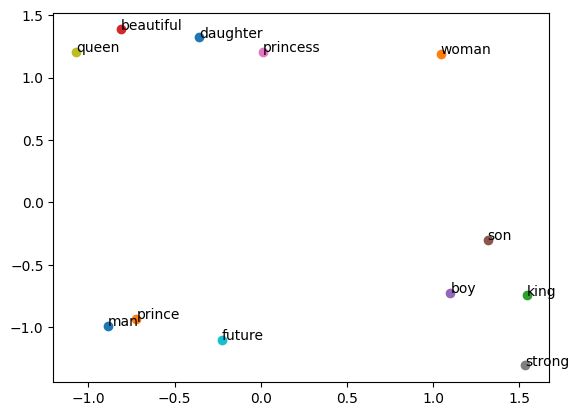

In [32]:
import matplotlib.pyplot as plt

# plt.figure(figsize = (10, 10))
for word in list(word_dict.keys()):
    coord = word_embedding.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

